In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/metadata/2020-05-14_pg1_3_all.csv')
df.head()

,Unnamed: 0,listing_id,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
0,0,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m1108769346x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
1,1,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m867679501xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
2,2,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2412943192x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
3,3,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2841480592x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
4,4,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m758422910xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015


In [3]:
base_path = '../data/listing_images/full/'
all_images = [base_path + elem for elem in df.image_file]

In [4]:
len(all_images)

5572

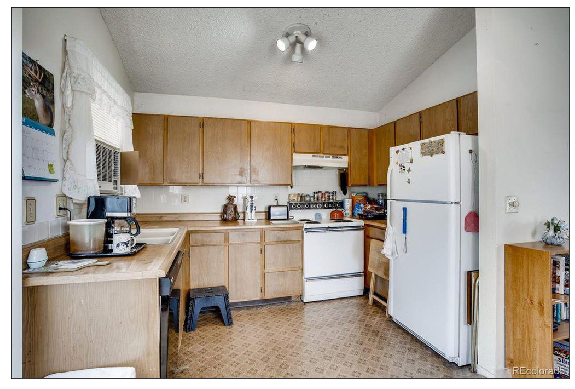

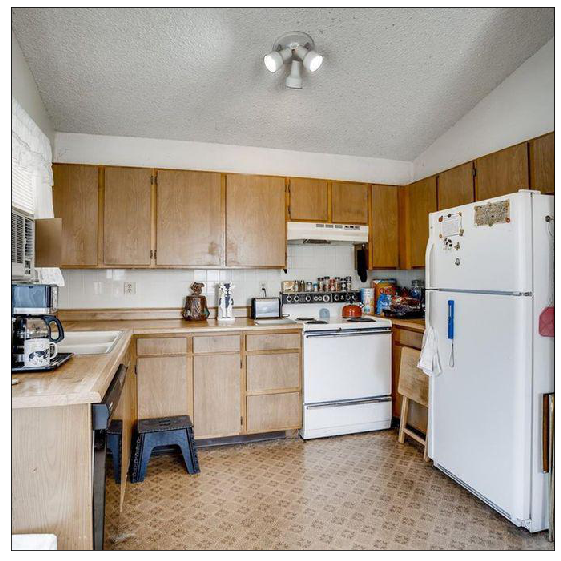

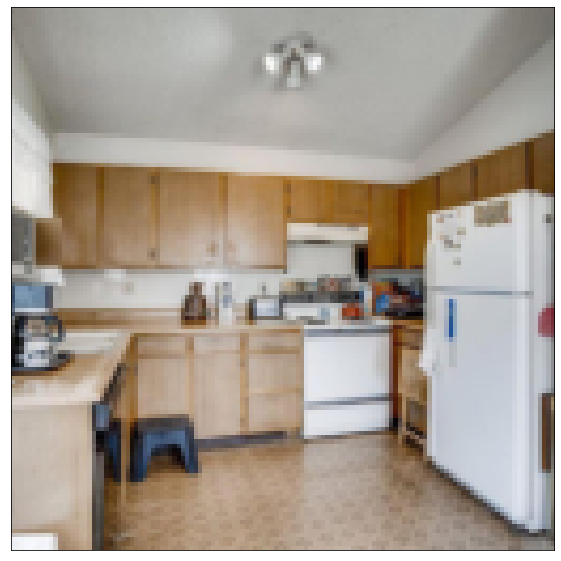

In [5]:
def plot_img(img,size=(10,10)):
    fig, ax = plt.subplots(1,figsize=size)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([])
    plt.show()

def crop_image(img, size):
    y_len, x_len, depth = test.shape
    crop_len = min([x_len,y_len])
    x_crop = [int((x_len/2) - (crop_len/2)), int((x_len/2) + (crop_len/2))]
    y_crop = [int((y_len/2) - (crop_len/2)), int((y_len/2) + (crop_len/2))]
    cropped = img[y_crop[0]:y_crop[1], x_crop[0]:x_crop[1]]
    return cropped

#     img = resize(cropped,(size,size))


    
test = imread(all_images[1])
test2 = crop_image(test, 32)
test3 = resize(test2,(128,128))


plot_img(test)
plot_img(test2)
plot_img(test3)


In [6]:
def grayscale(img):
    if len(img.shape) is 3:
        gray = rgb2gray(img)
    else:
        print('Image already grayscaled')
        gray = img
    return gray



def featurize(grey_imgs): 
    '''
    Input: Dictionary of images. 
    Output: 2-D NP Array. 
    Featurize the gray-scaled images and stack the results into a numpy array. 
    '''
    
    imgs = [np.ravel(img) for img in grey_imgs.values()]
    imgs_stacked = np.r_['0', imgs]

    return imgs_stacked

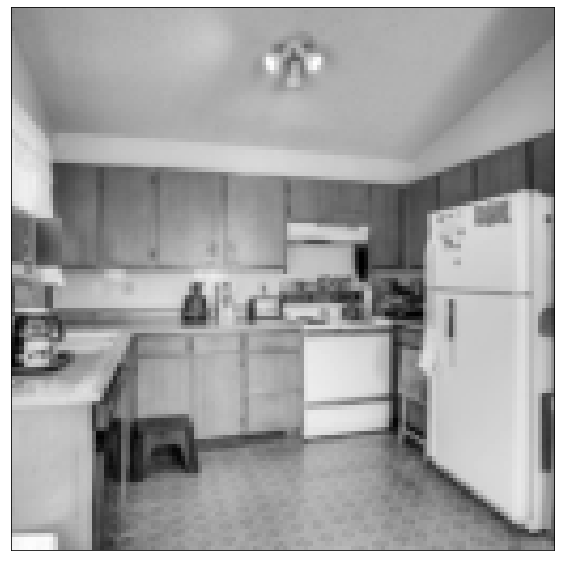

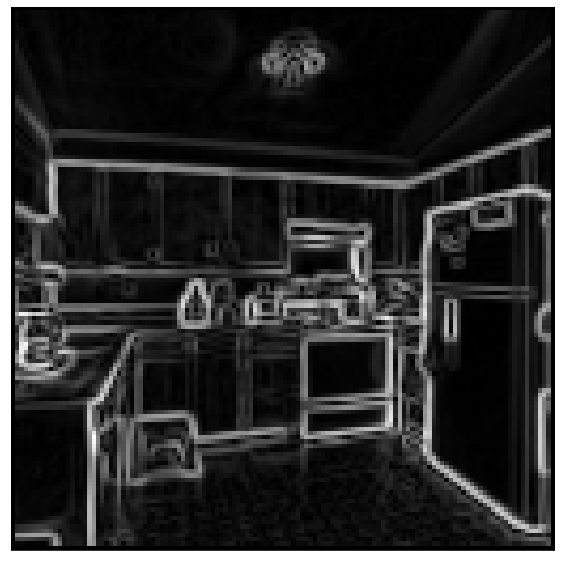

In [7]:
gray_im3 = grayscale(test3)
test4 = sobel(gray_im3)

featured = np.ravel(gray_im3)
plot_img(gray_im3)
plot_img(test4)